In [1]:
#Question:1
import pandas as pd
from sklearn.cluster import KMeans, kmeans_plusplus
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

# Load the data
data = pd.read_csv("CreditTask_dataset.csv")
print(data.shape)


(1059, 10)


In [2]:
#Question 2

print(data.dtypes)
import pandas as pd

def print_float_feature_medians(data):
  # Iterate over columns (features)
  for col in data.columns:
    # Check if data type is float
    if data[col].dtype == float:
      # Print median value for float columns
      print(f"Median of {col}:", data[col].median())

print_float_feature_medians(data)



_id                 int64
cartodb_id          int64
melbourne            bool
postcode            int64
id                  int64
fluoride_level     object
water_company      object
townsuburb         object
lat               float64
lon               float64
dtype: object
Median of lat: -37.788
Median of lon: 144.989


In [3]:
#Quesion 3

import pandas as pd

# Assuming 'data' is your DataFrame with the 'fluoride_level' column

# Print all possible values
print("All possible values of 'fluoride_level':")
print(data['fluoride_level'].unique())

# Calculate ratio of each value (excluding None)
value_counts = data['fluoride_level'].value_counts(dropna=False)  # Count all values, including None
total_count = len(data)

for val in value_counts.index:
  ratio = value_counts.loc[val] / total_count
  print(f"Ratio of fluoride_level {val}:", ratio)


All possible values of 'fluoride_level':
['Fluoridated' 'Not fluoridated' 'Partly fluoridated' 'Natural fluoride']
Ratio of fluoride_level Fluoridated: 0.7431539187913125
Ratio of fluoride_level Not fluoridated: 0.24173748819641172
Ratio of fluoride_level Partly fluoridated: 0.013220018885741265
Ratio of fluoride_level Natural fluoride: 0.0018885741265344666


In [4]:
#Question 4

import pandas as pd

# Filter rows for Melbourne (True)
melbourne_data = data[data['melbourne'] == True]

# Count occurrences of 'Fluorinated' in the 'fluoride_level' column
melbourne_fluoridated = melbourne_data['fluoride_level'].value_counts().get('Fluoridated', 0)

# Print the result
print(f"Number of places with fluoridated water in Melbourne: {melbourne_fluoridated}")

# Count occurrences of 'Fluorinated' in the 'fluoride_level' column
melbourne_partly_fluoridated = melbourne_data['fluoride_level'].value_counts().get('Partly fluoridated', 0)

# Print the result
print(f"Number of places with partly fluoridated water in Melbourne: {melbourne_partly_fluoridated}")

# Count occurrences of 'Fluorinated' in the 'fluoride_level' column
melbourne_not_fluoridated = melbourne_data['fluoride_level'].value_counts().get('Not fluoridated', 0)

# Print the result
print(f"Number of places with non fluoridated water in Melbourne: {melbourne_not_fluoridated}")

# Filter rows for Not Melbourne (False)
non_melbourne_data = data[data['melbourne'] == False]

# Count occurrences of 'Fluorinated' in the 'fluoride_level' column
non_melbourne_fluoridated = non_melbourne_data['fluoride_level'].value_counts().get('Fluoridated', 0)

# Print the result
print(f"Number of places with fluoridated water not in Melbourne: {non_melbourne_fluoridated}")

# Count occurrences of 'Fluorinated' in the 'fluoride_level' column
non_melbourne_partly_fluoridated = non_melbourne_data['fluoride_level'].value_counts().get('Partly fluoridated', 0)

# Print the result
print(f"Number of places with partly fluoridated water not in Melbourne: {non_melbourne_partly_fluoridated}")

# Count occurrences of 'Fluorinated' in the 'fluoride_level' column
non_melbourne_not_fluoridated = non_melbourne_data['fluoride_level'].value_counts().get('Not fluoridated', 0)

# Print the result
print(f"Number of places with non fluoridated water not in Melbourne: {non_melbourne_not_fluoridated}")


Number of places with fluoridated water in Melbourne: 381
Number of places with partly fluoridated water in Melbourne: 10
Number of places with non fluoridated water in Melbourne: 12
Number of places with fluoridated water not in Melbourne: 406
Number of places with partly fluoridated water not in Melbourne: 4
Number of places with non fluoridated water not in Melbourne: 244


In [5]:
#Question 5

import pandas as pd

# Assuming your DataFrame is loaded into a variable named 'data'

# Group data by suburb
grouped_data = data.groupby('townsuburb')

# Get descriptive statistics for the 'water_company' column within each suburb group
water_company_stats = grouped_data['water_company'].describe()

# Print the results (showing counts and potentially unique company names)
print("Water Company Statistics (grouped by suburb):")
print(water_company_stats)


Water Company Statistics (grouped by suburb):
              count unique                      top freq
townsuburb                                              
ABBOTSFORD        1      1          City West Water    1
ABERFELDIE        1      1          City West Water    1
ADDINGTON         1      1  Central Highlands Water    1
ADELAIDE LEAD     1      1  Central Highlands Water    1
AGNES             1      1    South Gippsland Water    1
...             ...    ...                      ...  ...
YELLINGBO         1      1       Yarra Valley Water    1
YENDON            1      1  Central Highlands Water    1
YERING            1      1       Yarra Valley Water    1
YINNAR            1      1          Gippsland Water    1
YUROKE            1      1       Yarra Valley Water    1

[1046 rows x 4 columns]


In [6]:
#Question 6

import pandas as pd

# Assuming your DataFrame is loaded into a variable named 'data'

# Count unique values in the 'suburb' column
suburb_counts = data['townsuburb'].value_counts()

# Print the results (number of water companies is equivalent to the number of unique suburbs)
print("Number of water companies serving different suburbs:")
print(suburb_counts)


Number of water companies serving different suburbs:
townsuburb
BAYSWATER      2
OAKLEIGH       2
UPWEY          2
TULLAMARINE    2
ARMADALE       2
              ..
FRYERSTOWN     1
FYANSFORD      1
GARDENVALE     1
GARFIELD       1
NHILL          1
Name: count, Length: 1046, dtype: int64


In [7]:
#Question 7

import pandas as pd

# Assuming your DataFrame is loaded into a variable named 'data'

# Filter for rows with fluoridated water
fluoridated_data = data[data['fluoride_level']== 'Fluoridated']
print(fluoridated_data)

# Group data by 'townsuburb' and count the number of companies in each suburb
water_companies_per_suburb = fluoridated_data.groupby('townsuburb')['water_company'].nunique()

# Find the suburb with the maximum count
most_companies_suburb = water_companies_per_suburb.idxmax()
number_companies = water_companies_per_suburb.max()

# Print the results
print(f"Suburb with the most fluoridated water companies: {most_companies_suburb}")
print(f"Number of unique fluoridated water companies serving {most_companies_suburb}: {number_companies}")



       _id  cartodb_id  melbourne  postcode    id fluoride_level  \
0        1         236      False      3227   236    Fluoridated   
1        2           1       True      3067     1    Fluoridated   
2        3           2       True      3040     2    Fluoridated   
4        5           4      False      3465     4    Fluoridated   
6        7           6      False      3231     6    Fluoridated   
...    ...         ...        ...       ...   ...            ...   
1050  1051        1051      False      3730  1051    Fluoridated   
1054  1055        1055      False      3352  1055    Fluoridated   
1055  1056        1056       True      3770  1056    Fluoridated   
1056  1057        1057      False      3869  1057    Fluoridated   
1057  1058        1058       True      3063  1058    Fluoridated   

                water_company     townsuburb        lat         lon  
0                Barwon Water     CONNEWARRE -38.264069  144.462309  
1             City West Water     ABBOTSFOR

In [8]:
#Question 8

import pandas as pd

# Assuming your DataFrame is loaded into a variable named 'data'

# Group data by 'townsuburb' and 'fluoride_level'
grouped_data = data.groupby(['townsuburb', 'fluoride_level'])

# Count the occurrences in each group (number of companies per combination)
water_companies_per_level = grouped_data['water_company'].count().unstack()

# Print the resulting DataFrame
print("Number of Water Companies by Fluoride Level (per Suburb):")
print(water_companies_per_level)


Number of Water Companies by Fluoride Level (per Suburb):
fluoride_level  Fluoridated  Natural fluoride  Not fluoridated  \
townsuburb                                                       
ABBOTSFORD              1.0               NaN              NaN   
ABERFELDIE              1.0               NaN              NaN   
ADDINGTON               NaN               NaN              1.0   
ADELAIDE LEAD           1.0               NaN              NaN   
AGNES                   NaN               NaN              1.0   
...                     ...               ...              ...   
YELLINGBO               NaN               NaN              NaN   
YENDON                  1.0               NaN              NaN   
YERING                  1.0               NaN              NaN   
YINNAR                  1.0               NaN              NaN   
YUROKE                  1.0               NaN              NaN   

fluoride_level  Partly fluoridated  
townsuburb                          
ABBOTSFOR

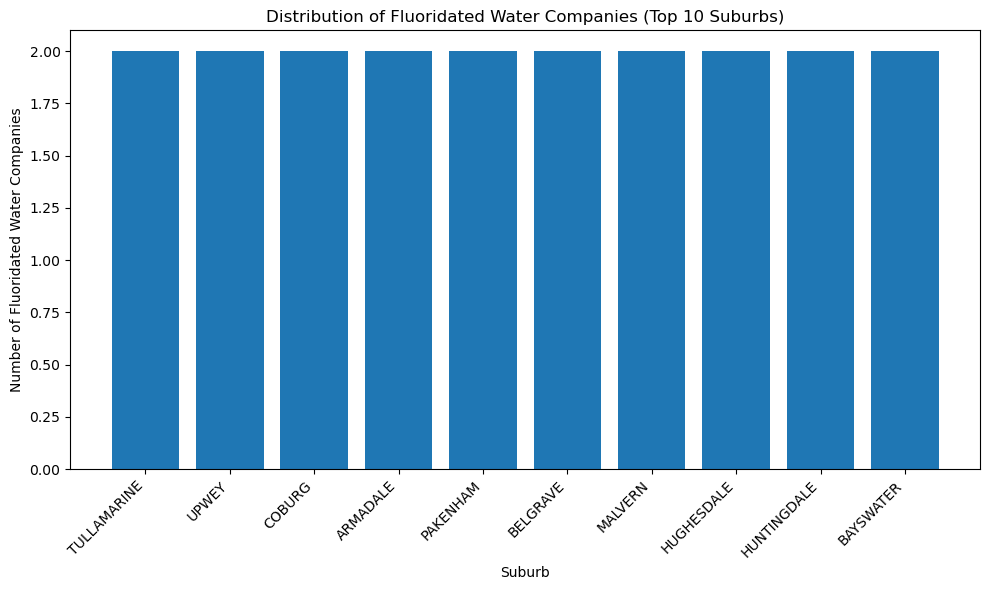

In [9]:
#Question 9

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is loaded into a variable named 'data'

# Filter for rows with fluoridated water
fluoridated_data = data[data['fluoride_level']== 'Fluoridated']
# print(fluoridated_data)

# Group data by 'townsuburb' and count the number of companies in each suburb
water_companies_per_suburb = fluoridated_data.groupby('townsuburb')['water_company'].nunique()

# Sort by number of companies (descending) and select top 10 suburbs
top_10_suburbs = water_companies_per_suburb.sort_values(ascending=False).head(10)

# Prepare data for histogram (optional for clarity)
suburb_names = top_10_suburbs.index.to_numpy()
company_counts = top_10_suburbs.to_numpy()

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(suburb_names, company_counts)
plt.xlabel("Suburb")
plt.ylabel("Number of Fluoridated Water Companies")
plt.title("Distribution of Fluoridated Water Companies (Top 10 Suburbs)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Explanation of the Results:
# The histogram visually represents the distribution of the number of fluoridated water companies
# across the top 10 suburbs. By analyzing the bar heights, you can observe which suburbs have the
# highest concentration of fluoridated water companies and how the distribution is spread out.

# Interpretations:
#  All top 10 suburb has 2 water companies providing fluoridated water. 


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

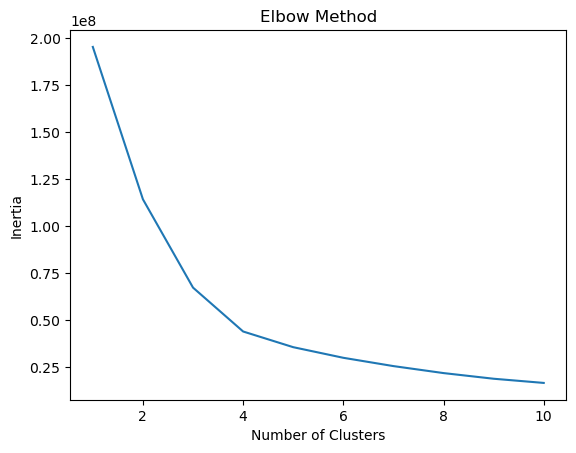

The number of clusters is different from the number of suburbs.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
#Question 10

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


#Encode categorical variables using LabelEncoder
le = LabelEncoder()
data['fluoride_level'] = le.fit_transform(data['fluoride_level'])
data['water_company'] = le.fit_transform(data['water_company'])
data['townsuburb'] = le.fit_transform(data['townsuburb'])

# Select the relevant features for clustering
features = ['melbourne', 'postcode', 'fluoride_level', 'water_company', 'townsuburb', 'lat', 'lon']
X = data[features]

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#optimal number of clusters based on the elbow curve
optimal_clusters = 4  

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X)

#  cluster labels for each water company
labels = kmeans.labels_

# Count the number of unique suburbs in the dataset
num_suburbs = data['townsuburb'].nunique()

# Comparing the number of clusters with the number of suburbs
if optimal_clusters == num_suburbs:
    print("The number of clusters is the same as the number of suburbs.")
else:
    print("The number of clusters is different from the number of suburbs.")

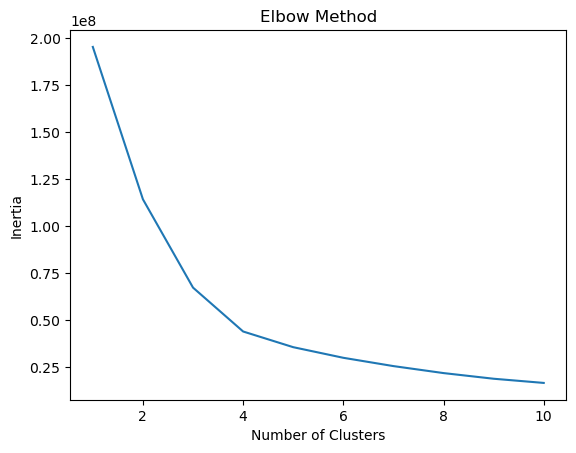

Purity Score: 0.0009442870632672333


In [11]:
#Question 11

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming 'data' is your DataFrame containing the dataset

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
data['fluoride_level'] = le.fit_transform(data['fluoride_level'])
data['water_company'] = le.fit_transform(data['water_company'])
data['townsuburb'] = le.fit_transform(data['townsuburb'])

# Select the relevant features for clustering
features = ['melbourne', 'postcode', 'fluoride_level', 'water_company', 'townsuburb', 'lat', 'lon']
X = data[features]

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
optimal_clusters = 4  # Adjust this value based on the elbow curve

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(X)

# Get the cluster labels for each water company
labels = kmeans.labels_

# Calculate the purity score
# Assuming 'town_suburb' is the ground truth for evaluation
true_labels = data['townsuburb']
purity = accuracy_score(true_labels, labels)

print("Purity Score:", purity)




In [12]:
#Question 12

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Perform K-Means++ with the optimal number of clusters
optimal_clusters = 4 
kmeans_plus = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42).fit(X)

# Get the cluster labels for each water company
labels_plus = kmeans_plus.labels_

# Calculate the purity score for K-Means++
true_labels = data['townsuburb']
purity_plus = accuracy_score(true_labels, labels_plus)

print("Purity Score (K-Means++):", purity_plus)

print("Purity Score (K-Means):", purity)

if purity_plus > purity:
    print("K-Means++ performs better than regular K-Means in terms of purity score.")
elif purity_plus < purity:
    print("Regular K-Means performs better than K-Means++ in terms of purity score.")
else:
    print("K-Means++ and regular K-Means have the same purity score.")

Purity Score (K-Means++): 0.0009442870632672333
Purity Score (K-Means): 0.0009442870632672333
K-Means++ and regular K-Means have the same purity score.


In [13]:
#Question 13
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#Hierachichal clustering is being implemented.

# Perform Hierarchical Agglomerative Clustering
optimal_clusters_h = 4  
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters_h).fit(X)

# Get the cluster labels for each water company
labels_hierarchical = hierarchical.labels_

# purity score for Hierarchical Clustering
purity_hierarchical = accuracy_score(true_labels, labels_hierarchical)

print("Purity Score (Hierarchical Clustering):", purity_hierarchical)


print("Purity Score (K-Means++):", purity_plus)


print("Purity Score (K-Means):", purity)

if purity_hierarchical > purity_plus and purity_hierarchical > purity:
    print("Hierarchical Clustering performs better than K-Means++ and regular K-Means in terms of purity score.")
elif purity_plus > purity_hierarchical and purity_plus > purity:
    print("K-Means++ performs better than Hierarchical Clustering and regular K-Means in terms of purity score.")
elif purity > purity_hierarchical and purity > purity_plus:
    print("Regular K-Means performs better than Hierarchical Clustering and K-Means++ in terms of purity score.")
else:
    print("The clustering methods have similar purity scores.")

Purity Score (Hierarchical Clustering): 0.0009442870632672333
Purity Score (K-Means++): 0.0009442870632672333
Purity Score (K-Means): 0.0009442870632672333
The clustering methods have similar purity scores.
